# Trend for EV sales with US tax policy

In [239]:
import pandas as pd
import matplotlib.pylab as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.pyplot import figure
import matplotlib
import numpy as np

import plotly.express as px
import seaborn as sns
from scipy.stats import ttest_ind
import geopandas as gpd
from geopandas import GeoDataFrame

%matplotlib inline

## Parameters 

In [240]:
EV_SALE_DATASET = '../Processed_Data/Ev_sales.csv'
TAX_POLICY_DATASET = '../Processed_Data/policy_state.csv'
FEDERAL_REGION_DATASET = '../Processed_Data/States_Info.csv'

# Load Datasets
## Load the EV sales dataset

In [241]:
df_sales = pd.read_csv(EV_SALE_DATASET,index_col=[0],nrows=51,thousands=',')
df_sales = df_sales.set_index("State")
df_sales.head()

,2016,2017,2018,2019
State,,,,
California,73854,94873,153442,145020
New York,6043,10090,15752,14823
Washington,5363,7068,12650,12172
Florida,6255,6573,13705,15794
Texas,4510,5419,11764,5780


## Load the US tax policy dataset

In [242]:
df_tax = pd.read_csv(TAX_POLICY_DATASET)
df_tax = df_tax.set_index("State")
df_tax = df_tax.rename(index={'Kansa': 'Kansas'})
df_tax.head()

,Laws and Regulations,State Incentives,Utility/Private Incentives,Total
State,,,,
Alabama,3,2,3,8.0
Alaska,2,0,4,6.0
Arizona,9,5,10,24.0
Arkansas,4,1,1,6.0
California,47,40,46,133.0


## Load the US Standard Federal Regions dataset

In [243]:
df_region = pd.read_csv(FEDERAL_REGION_DATASET)
df_region = df_region.set_index("States")
df_region.head()

,Region,Geo Region,Party
States,,,
Alabama,Region_4,South,Republican
Alaska,Region_10,West,Republican
Arizona,Region_9,West,Democratic
Arkansas,Region_6,South,Republican
California,Region_9,West,Democratic


Merge sales and tax into one df

In [244]:
df_tax_and_sales = pd.concat([df_tax, df_sales], axis = 1)
df_tax_and_sales = pd.concat([df_tax_and_sales, df_region], axis = 1)
df_tax_and_sales.head()

,Laws and Regulations,State Incentives,Utility/Private Incentives,Total,2016,2017,2018,2019,Region,Geo Region,Party
Alabama,3.0,2.0,3.0,8.0,330.0,381.0,866.0,1007.0,Region_4,South,Republican
Alaska,2.0,0.0,4.0,6.0,94.0,85.0,155.0,143.0,Region_10,West,Republican
Arizona,9.0,5.0,10.0,24.0,2265.0,2976.0,7086.0,7591.0,Region_9,West,Democratic
Arkansas,4.0,1.0,1.0,6.0,138.0,187.0,435.0,538.0,Region_6,South,Republican
California,47.0,40.0,46.0,133.0,73854.0,94873.0,153442.0,145020.0,Region_9,West,Democratic


In [246]:
# Rename some column-name
df_tax_and_sales['Avg NEV Regist Num'] = df_tax_and_sales[['2016','2017','2018','2019']].mean(axis=1)
df_tax_and_sales = df_tax_and_sales.rename(columns={'Total': 'Total Tax-Policy Num'})

In [247]:
# Drop row contain NaN value
print(len(df_tax_and_sales))
df_tax_and_sales = df_tax_and_sales.dropna(subset=['Total Tax-Policy Num', 'Avg NEV Regist Num'])
print(len(df_tax_and_sales))

52
50


## Find the best and worst NEV sales & Tax Policy states

In [292]:
print(df_tax_and_sales.sort_values(by=['Avg NEV Regist Num'],ascending=False)["Avg NEV Regist Num"].head(1))
print(df_tax_and_sales.sort_values(by=['Total Tax-Policy Num'],ascending=False)["Avg NEV Regist Num"].head(1))

California    116797.25
Name: Avg NEV Regist Num, dtype: float64
California    116797.25
Name: Avg NEV Regist Num, dtype: float64


In [291]:
print(df_tax_and_sales.sort_values(by=['Avg NEV Regist Num'])["Avg NEV Regist Num"].head(1))
print(df_tax_and_sales.sort_values(by=['Total Tax-Policy Num'])["Avg NEV Regist Num"].head(1))

North Dakota    72.0
Name: Avg NEV Regist Num, dtype: float64
Kentucky    557.75
Name: Avg NEV Regist Num, dtype: float64


# Visualising NEV sales & Tax Policy

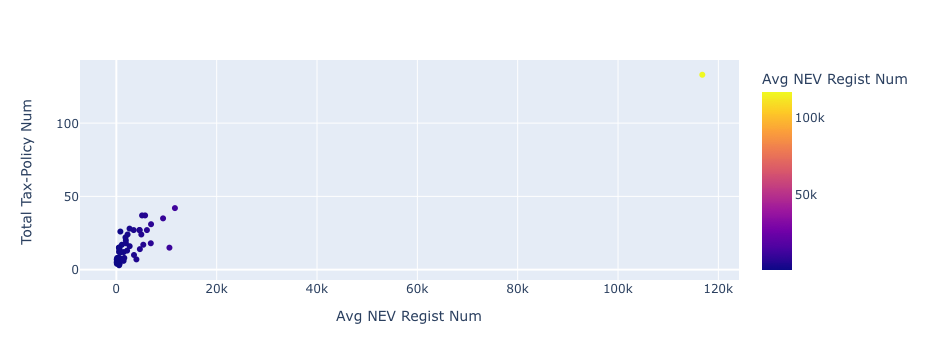

In [248]:
fig = px.scatter(df_tax_and_sales, x="Avg NEV Regist Num", y="Total Tax-Policy Num", color="Avg NEV Regist Num" ,hover_data=['Avg NEV Regist Num'])
fig.update_traces(mode="markers", hovertemplate=None)
fig.update_layout(hovermode="x")
fig.show()

## Drop CA outlier

In [249]:
new = df_tax_and_sales[df_tax_and_sales.index != "California"]

In [250]:
new = new.reset_index()
new = new.rename(columns={'index': 'State'})

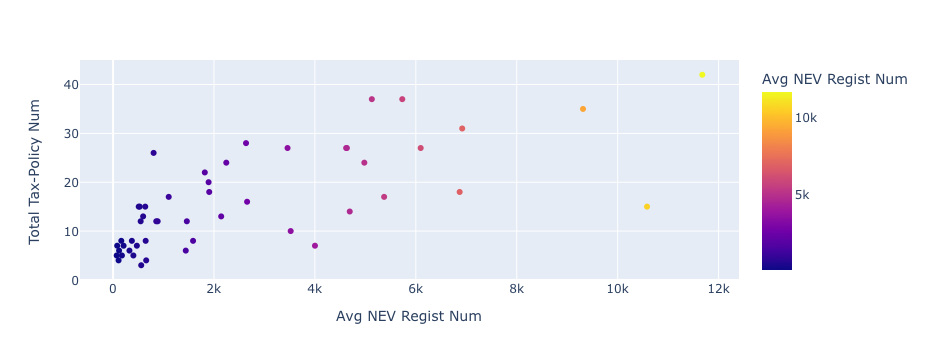

In [264]:
fig = px.scatter(new, x="Avg NEV Regist Num", y="Total Tax-Policy Num", color="Avg NEV Regist Num" ,hover_data=['Avg NEV Regist Num'])
fig.update_traces(mode="markers", hovertemplate=None)
fig.update_layout(hovermode="x")
fig.show()

## Classified by US 10 Federal Regions

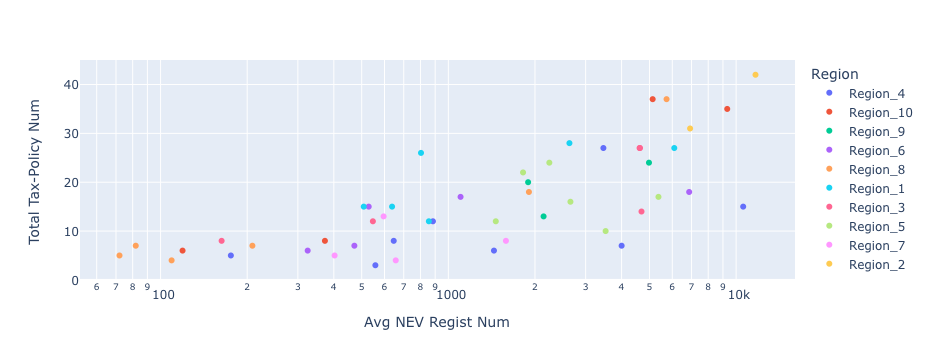

In [251]:
fig = px.scatter(new, x="Avg NEV Regist Num", y="Total Tax-Policy Num",\
                 color="Region", log_x=True, hover_name="State")
fig.show()

## Classified by Geographic Regions

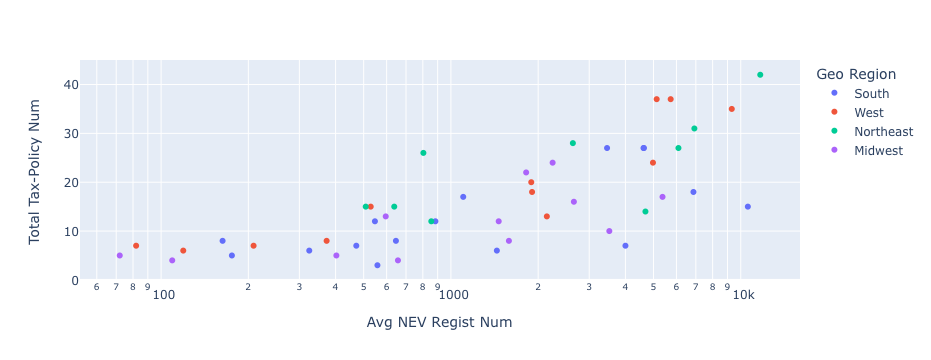

In [268]:
fig = px.scatter(new, x="Avg NEV Regist Num", y="Total Tax-Policy Num",\
                 color="Geo Region", log_x=True, hover_name="State")
fig.show()

## Classified by Political Parties

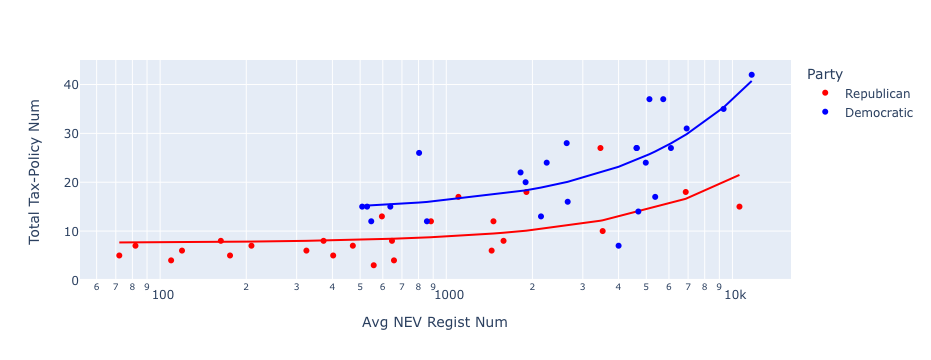

In [266]:
fig = px.scatter(new, x="Avg NEV Regist Num", y="Total Tax-Policy Num",\
                 color="Party",color_discrete_sequence=["red", "blue"], \
                 trendline="ols",log_x=True, hover_name="State")
fig.show()

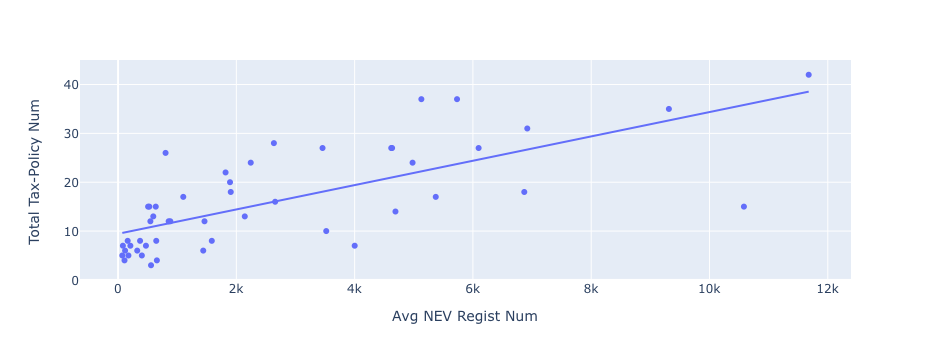

In [265]:
fig = px.scatter(new, x="Avg NEV Regist Num", y="Total Tax-Policy Num", trendline="ols")
fig.show()